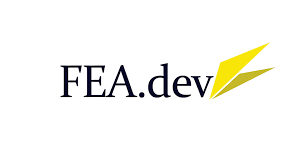

# <font color=white|cyan>Visualizando dados sobre a Pandemia da Covid-19</font> 

Neste artigo apresentarei várias formas de visualização de dados acerca da Pandemia da Covid-19 no Brasil. Utilizarei algumas bibliotecas diferentes e ensinarei a vocês como utilizá-las.

# Importando os dados, bibliotecas, etc.

Antes de tudo precisamos importar as bibliotecas e os dados que vamos usar. Mas o que são bibliotecas? Dados? Bom, podemos entender bibliotecas como conjuntos de módulos e funções - já prontas - que nos auxiliam na construção do nosso código. Imagine que complicado seria se a cada linha do nosso código tivessémos que criar funções para realizar cada tarefa? Trabalhoso demais, né? É ai que as bibliotecas entram para nos auxiliar, elas nos apresentam uma gama de funções para que nosso trabalho seja mais rápido. É claro que você pode criar novas funções que achar interessante, as vezes queremos fazer algo muito específico e criamos nossas próprias funções, mas se fossemos fazer isso a cada linha de código, além dele ficar gigante demais, levaria muito mais tempo para realizar uma tarefa que pode ser muito mais rápida com o uso das bibliotecas.
Já os dados representam um conjunto de informações sobre algo, por exemplo, pense em uma planilha com todos os nomes dos funcionários públicos do Estado de São Paulo, com informações como salário, idade, data de nascimento e endereço. Isso é um conjunto de dados. 
É por meio das bibliotecas que conseguimos fazer o tratamento dos dados (como os dos funcionários do Estado de São Paulo) para trabalhar com a informação do jeito que quisermos. Seja fazendo uma visualização dos funcionários por meio de gráfico, que nos possibilitaria saber qual a proporção de funcionários em cada bairro, qual a proporção de idades, quais funcionários estão perto de se aposetar, ou seja, uma análise geral do seu perfil, por exemplo.
Dito tudo isso, vamos importar as bibliotecas e os dados que usaremos.

In [152]:
# Importando as bibliotecas:
import matplotlib.pyplot as plt # biblioteca utilizada para a visualização dos dados e também para a elaboração de gráficos.
import seaborn as sns # biblioteca usada para a plotagem dos mais variados tipos de gráficos. Ela é muito utilizada na visualização de séries temporais.
import plotly.express as px # faz parte da biblioteca Plotly e é utilizada para plotagem de figuras e gráficos.
import pandas as pd # biblioteca utilizada para manipulação e análise de dados.

# Nomeando os dados sobre o número de óbitos:
obitos = pd.read_csv('obito_cartorio.csv', na_values ='n/a', usecols = [0,1,3,10]) # aqui utilizei essa função do pandas que lê um arquivo csv e tranforma em DataFrame para ser utilizado no código. 

A base de dados foi retirada do site Brasi.io. Pode ser encontrado no seguinte link: https://brasil.io/dataset/covid19/files/

In [153]:
# Vamos visualizar o DataFrame para ver quais informações temos nele
obitos

,date,state,epidemiological_week_2020,deaths_covid19
0,2020-01-01,AC,1,0
1,2020-01-02,AC,1,0
2,2020-01-03,AC,1,0
3,2020-01-04,AC,1,0
4,2020-01-05,AC,2,0
...,...,...,...,...
9877,2020-12-27,TO,53,864
9878,2020-12-28,TO,53,865
9879,2020-12-29,TO,53,865
9880,2020-12-30,TO,53,865


In [154]:
# Agora vamos ver se há dados duplicados, por exemplo se há algum dia que está repetido:

duplicados_obitos = obitos.duplicated()
duplicados_obitos 

0       False
1       False
2       False
3       False
4       False
        ...  
9877    False
9878    False
9879    False
9880    False
9881    False
Length: 9882, dtype: bool

Como não apareceu "True" em nenhuma linha, podemos dizer que não há dados duplicados.

In [155]:
# Vamos visualizar as informações do DataFrame:

obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       9882 non-null   object
 1   state                      9882 non-null   object
 2   epidemiological_week_2020  9882 non-null   int64 
 3   deaths_covid19             9882 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 308.9+ KB


Pudemos ver que há 4 colunas (date, state, epidemiological_week_2020 e deaths_covid19) 9882 linhas.

In [156]:
# Vamos ver se há dados nulos (valor desconhecido ou ausente) no DataFrame e, caso tenha, vamos excluir:
obitos.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        date  state  epidemiological_week_2020  deaths_covid19
0     False  False                      False           False
1     False  False                      False           False
2     False  False                      False           False
3     False  False                      False           False
4     False  False                      False           False
...     ...    ...                        ...             ...
9877  False  False                      False           False
9878  False  False                      False           False
9879  False  False                      False           False
9880  False  False                      False           False
9881  False  False                      False           False

[9882 rows x 4 columns]>

Como pudemos ver, não aparece "True" nas linhas, isso que dizer que não há valores nulos.

In [157]:
# Para melhor visualização e para o nosso DataFrame ficar mais apresentável vou renomear o noem das colunas:
obitos = obitos.rename(columns={'date':'Data', 'state':'UF', 'epidemiological_week_2020':'Semana Epdemiológica', 'deaths_covid19':'Mortes por Covid-19'})

In [158]:
# Vamos visualizar a mudança:
obitos

,Data,UF,Semana Epdemiológica,Mortes por Covid-19
0,2020-01-01,AC,1,0
1,2020-01-02,AC,1,0
2,2020-01-03,AC,1,0
3,2020-01-04,AC,1,0
4,2020-01-05,AC,2,0
...,...,...,...,...
9877,2020-12-27,TO,53,864
9878,2020-12-28,TO,53,865
9879,2020-12-29,TO,53,865
9880,2020-12-30,TO,53,865


# Começando a visualização dos dados

Vamos começar criando um gráfico que mostre as mortes por Covid-19 do nosso conjunto de dados, para termos uma ideia de como foi o seu crescimento ao longo dos meses.

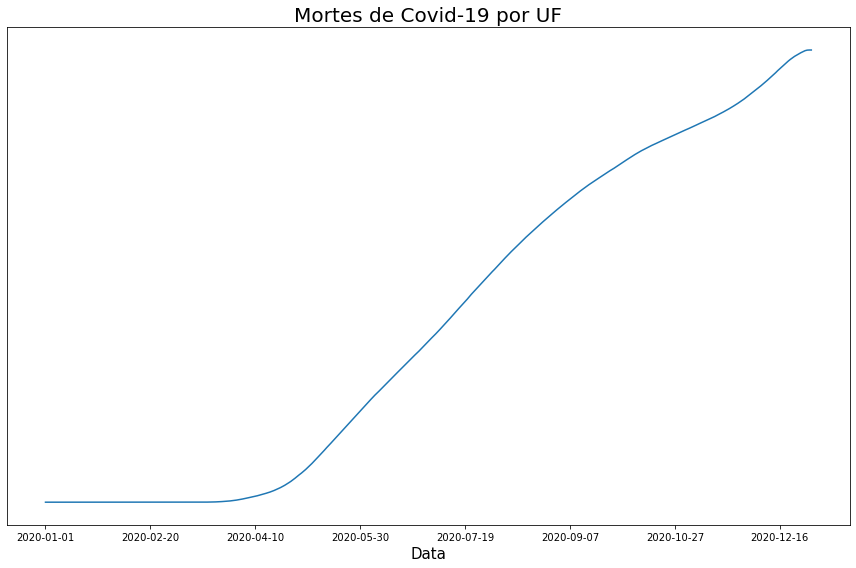

In [159]:
# Criando uma figura, axes e alterando o tamanho:
fig, ax = plt.subplots(figsize=(12,8))

# Criando o gráfico de linha:
obitos.groupby('Data')['Mortes por Covid-19'].sum().sort_values(ascending=True).plot(kind='line')

# Adicionando título:
ax.set_title('Mortes de Covid-19 por UF', fontdict={'fontsize':20})

# Mudando e nome e tamanho dos dados do eixo x:
ax.set_xlabel('Data', fontdict={'fontsize':15})

# Vamos remover as legendas e os valores do eixo y:
ax.tick_params(axis='y', labelleft=False, left=None)    

# Otimizando o espaço da figura:
fig.tight_layout()

Agora vamos criar um gráifoc de barras que nos mostre como se deu a distribuição de mortes pelos estados.

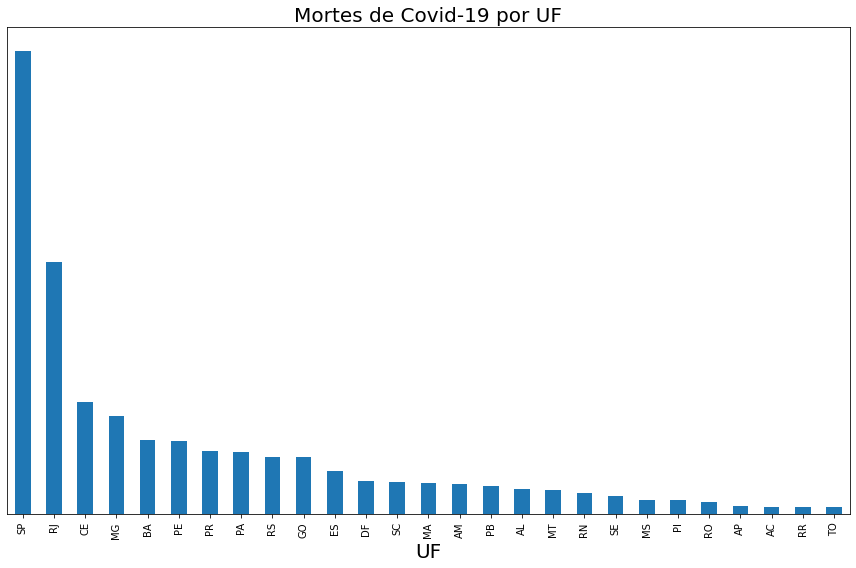

In [160]:
# Criando uma figura, axes e alterando o tamanho:
fig, ax = plt.subplots(figsize=(12,8))

# Criando o gráfico de barras:
obitos.groupby('UF')['Mortes por Covid-19'].sum().sort_values(ascending=False).plot(kind='bar')

# Adicionando título:
ax.set_title("Mortes de Covid-19 por UF", fontdict={'fontsize':20})

# Mudando e nome e tamanho dos dados do eixo x:
ax.set_xlabel('UF', fontdict={'fontsize':20})

# Vamos remover as legendas e os valores do eixo y:
ax.tick_params(axis='y', labelleft=False, left=None)                  

# Otimizando o espaço da figura:
fig.tight_layout()

Ao olhar o DataFrame lá no começo, pudemos ver que há uma coluna com a a indicação da semana epdemiológica. Vamos criar um gráfico de barras que nos mostre isso.

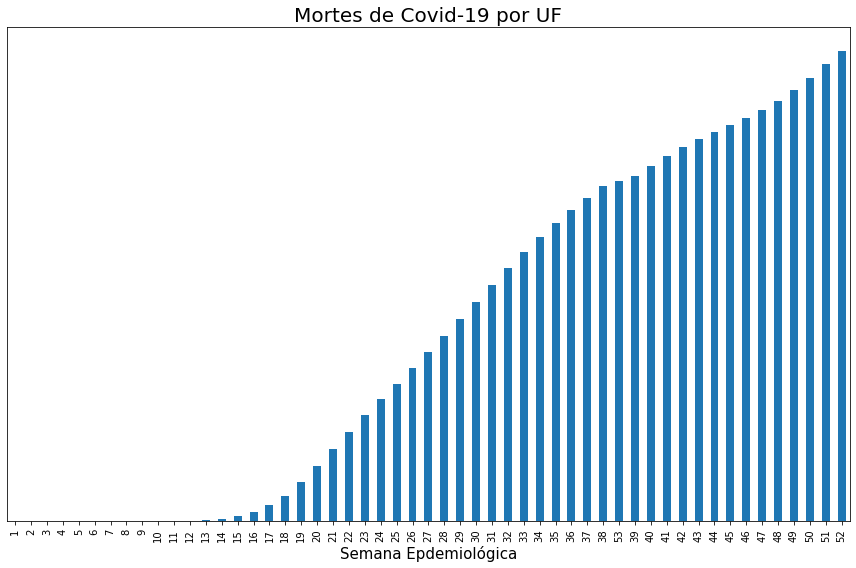

In [161]:
# Criando uma figura, axes e alterando o tamanho:
fig, ax = plt.subplots(figsize=(12,8))

# Criando o gráfico de barras:
obitos.groupby('Semana Epdemiológica')['Mortes por Covid-19'].sum().sort_values(ascending=True).plot(kind='bar')

# Adicionando título:
ax.set_title('Mortes de Covid-19 por UF', fontdict={'fontsize':20})

# Mudando e nome e tamanho dos dados do eixo x:
ax.set_xlabel('Semana Epdemiológica', fontdict={'fontsize':15})

# Vamos remover as legendas e os valores do eixo y:
ax.tick_params(axis='y', labelleft=False, left=None)                  

# Otimizando o espaço da figura:
fig.tight_layout()

Agora já conseguimos ter uma visualização geral de como as mortes se deram em cada estado, no Brasil inteiro e por semana epdemiológica. Mas e se quiséssemos tr uma noção maior da proporção de cada estado no número de mortes, como faríamos? Podemos criar um gráfico de pizza que represente isso.

In [162]:
# Vamos agrupar os números de óbitos por estado
obitos_pizza = obitos.groupby('UF')['Mortes por Covid-19'].sum().sort_values(ascending=False)

In [163]:
# Vamos resetar index para que a coluna UF não seja index.
obitos_pizza = obitos_pizza.reset_index()

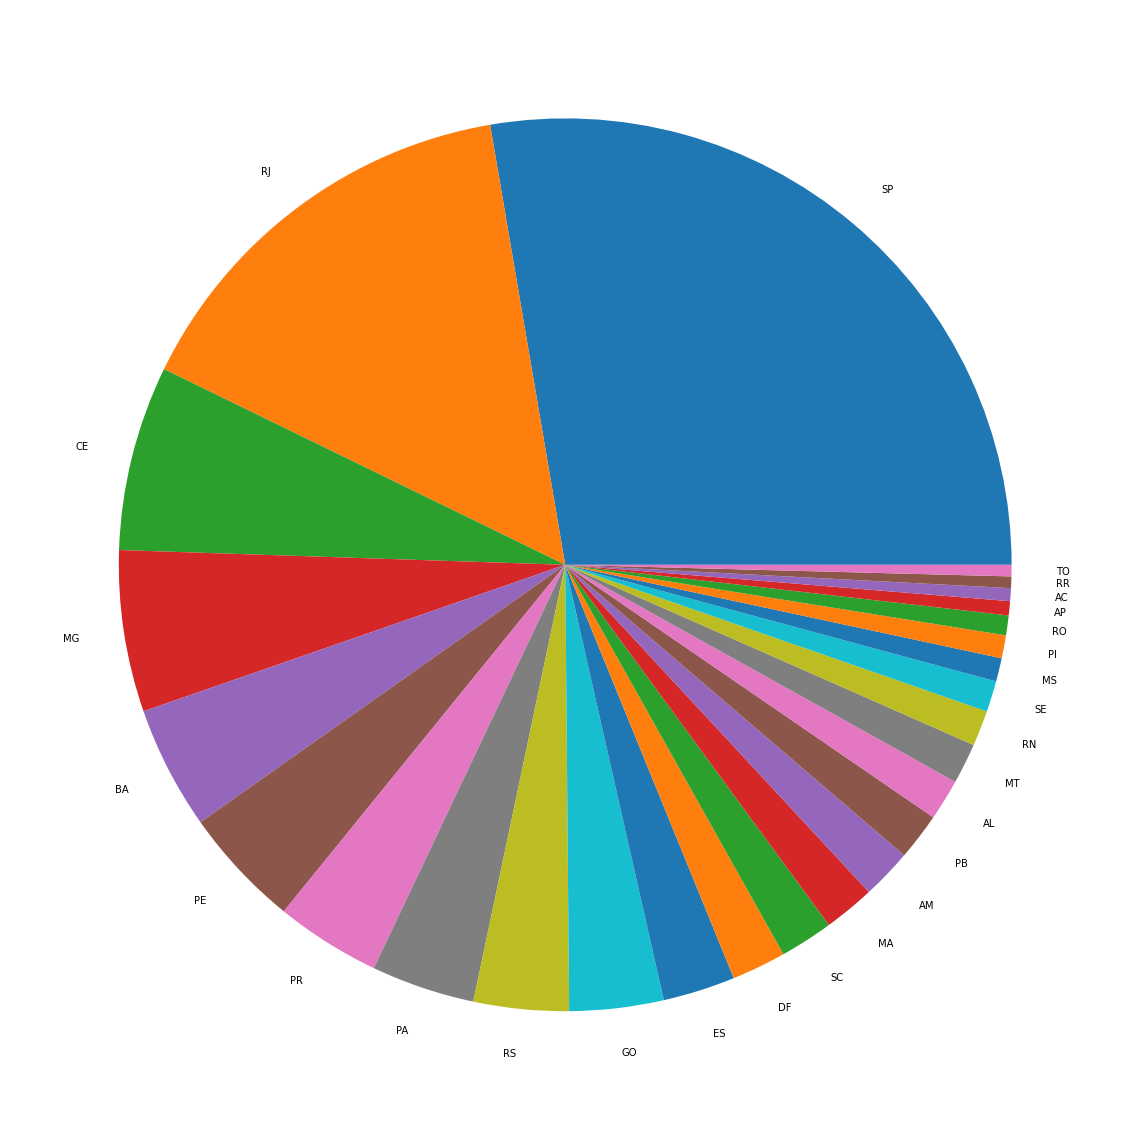

In [164]:
# Criando um gráfico de pizza
fig = plt.figure(figsize=(20,50))
plt.pie(obitos_pizza['Mortes por Covid-19'], labels=obitos_pizza['UF'])
plt.show()

Bom, o gráfico acima nos mostreou a distribuição por estado, mas qual a porcetagem de cada estado? É possível ter uma visualização assim? Sim, é póssível. Veremos abaixo.

In [165]:
fig = px.pie(names = obitos_pizza['UF'], values = obitos_pizza['Mortes por Covid-19'], width = 1000, height = 800)
fig.show()

## Conclusão
Bom, foram poucos gráficos, mas tenho certeza que com a visualização deles ficou muito mais fácil de você entender e perceber como se deu as mortes por Covid-19 no Brasil. Qual estado teve mais mortes, qual teve menos, qual data ou semana epdemiológica teve mais mortes, etc. Enfim, com a visualização gráfica conseguimos ter uma noção maior e fazer diversas inferências, além de criar hipóteses sobre os dados. Por isso, as bibliotecas que nos auxiliam com a visualização de dados são tão importantes. A nossa interpretação somente com DataFrames acaba sendo muito limitada, pois ele não é tão intuitivo quanto os gráficos e figuras, conseguimos compreender os dados de maneira muito mais rápida com imagens.